Requirements: <br>
pandas <br>
openpyxl <br>
matplotlib <br>
wordcloud

In [4]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Gesprekken.xlsx", header=None)

df = df.drop(df.columns[[0, 1]], axis=1)
df

,2
0,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
1,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
2,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
3,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
4,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
...,...
547,user: Ben je ooit verliefd geweest?\n\nbot: Ac...
548,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
549,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
550,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."


In [14]:
# Split the text in the dataframe on "\n"
df_split = df[2].str.split('\n', expand=True)

# Display the first few rows of the split dataframe
df_split.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,user: Hoi Vincent,,"bot: Hé, zoo leuk je te leren kennen. Hoe gaat...",,user: Wie inspireerde je?,,bot: Ik liet me graag inspireren door andere k...,,user: En Gauguin?,,...,None,None,None,None,None,None,None,None,None,None
1,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Voor wie schilderde je de amandelbloesem?,,"bot: Waarde vriend, ik schilderde de amandelbl...",,user: EN waren ze er blij mee?,,...,None,None,None,None,None,None,None,None,None,None
2,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Voor wie schilderde je de amandelbloesem?,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Heb je wel eens met een man gezoend?,,"bot: Waarde vriend, ik heb in mijn leven enkel...",,user: Wat heb je het vaakst geschilderd?,,...,None,None,None,None,None,None,None,None,None,None
4,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Ben je weleens verliefd geweest?,,"bot: Ja, ik ben weleens verliefd geweest. Ik w...",,"bot: Excuses, dat was niet mijn bedoeling. Ik ...",,...,None,None,None,None,None,None,None,None,None,None


In [6]:
# Function to calculate the length of each row until a column with None is reached
def row_length_until_none(row):
    for i, value in enumerate(row):
        if value is None:
            return i
    return len(row)

# Apply the function to each row and calculate the average length
average_length = df_split.apply(row_length_until_none, axis=1).mean()
print(f"The average length of rows until a column with None is reached: {average_length}")

The average length of rows until a column with None is reached: 17.13768115942029


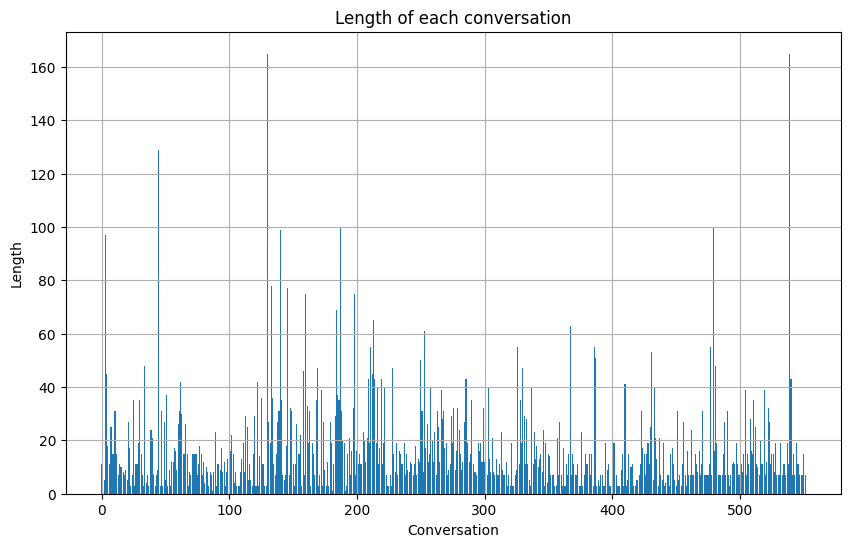

In [7]:
import matplotlib.pyplot as plt

# Calculate the row lengths until None for each row
row_lengths = df_split.apply(row_length_until_none, axis=1)

# Plot the row lengths using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(row_lengths)), row_lengths)
plt.title('Length of each conversation')
plt.xlabel('Conversation')
plt.ylabel('Length')
plt.grid(True)
plt.show()

In [8]:
def count_words_until_none(row):
    word_count = 0
    for cell in row:
        if cell is None:
            break
        word_count += len(str(cell).split())
    return word_count

# Apply the function to each row
word_counts = df_split.apply(count_words_until_none, axis=1)

# Display the word counts
word_counts

0       138
1       274
2        18
3      1281
4       623
       ... 
547     173
548      54
549      59
550     145
551      68
Length: 552, dtype: int64

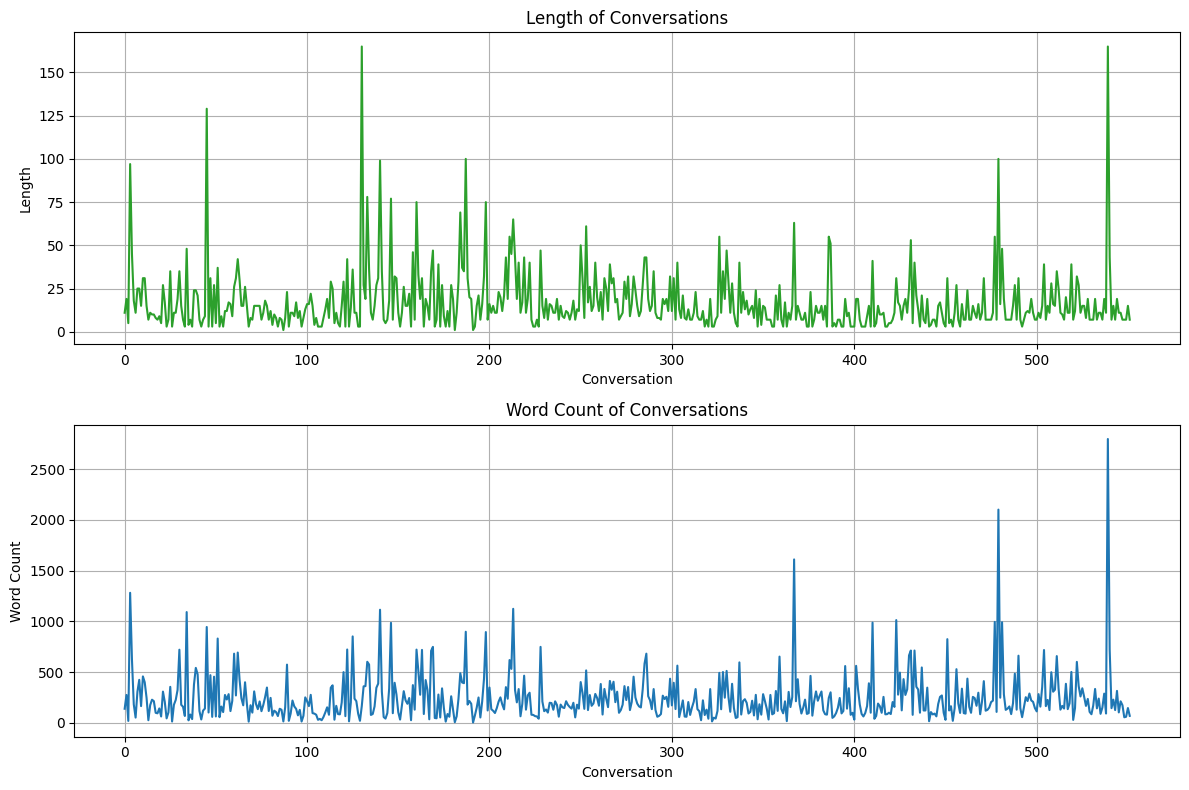

In [9]:
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 8))

# Plot word counts
ax1.plot(word_counts, color='tab:blue')
ax1.set_title('Word Count of Conversations')
ax1.set_xlabel('Conversation')
ax1.set_ylabel('Word Count')
ax1.grid(True)

# Plot conversation lengths
ax2.plot(row_lengths, color='tab:green')
ax2.set_title('Length of Conversations')
ax2.set_xlabel('Conversation')
ax2.set_ylabel('Length')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Get the first row
row = df_split.iloc[1]

# Iterate through the cells and print them one by one
for cell in row:
    if cell is not None:
        print(cell)

user: Hoi Vincent..

bot: Hé, zoo leuk je te leren kennen.

user: Voor wie schilderde je de amandelbloesem?

bot: Waarde vriend, ik schilderde de amandelbloesem als cadeau voor mijn broer Theo en zijn vrouw Jo, omdat zij net een zoon hadden gekregen: Vincent Willem. Het schilderij was een symbool voor nieuw leven en ik hoopte dat mijn neefje net zo vasthoudend en moedig zou worden als ik.

user: EN waren ze er blij mee?

bot: Ja, Theo en Jo waren erg blij met de amandelbloesem. Het schilderij hing in hun slaapkamer en zij waren er zeer aan gehecht. Het schilderij is later doorgegeven aan hun zoon, Vincent Willem van Gogh.

user: Vertel eens iets over Sien?

bot: Clasina Maria 'Sien' Hoornik was een vrouw die ik ontmoette in 1882 en met wie ik een relatie had. Ze was een voormalige prostituee en woonde in Den Haag met haar moeder. Ik tekende een aantal portretten van haar en haar kinderen en ik was erg begaan met haar welzijn. Na een tijdje verhuisde ze bij mij in en we woonden samen in

In [15]:
from collections import Counter
import re

# Flatten the dataframe into a single string
all_text = ' '.join(df_split.fillna('').values.flatten())

# Use regular expressions to find all words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the occurrences of each word
word_counts = Counter(words)

# Display the most common words
most_common_words = word_counts.most_common()
for word in most_common_words:
    print(word)

('ik', 5458)
('en', 3995)
('het', 3956)
('de', 3728)
('mijn', 2977)
('een', 2950)
('van', 2656)
('in', 2599)
('je', 2522)
('user', 2264)
('bot', 2210)
('dat', 1754)
('te', 1571)
('is', 1414)
('met', 1385)
('niet', 1319)
('me', 1050)
('op', 1008)
('voor', 1000)
('heb', 961)
('om', 924)
('zijn', 919)
('maar', 911)
('was', 893)
('wat', 873)
('die', 871)
('mij', 843)
('ben', 785)
('kan', 775)
('als', 772)
('ook', 697)
('werk', 681)
('hoe', 593)
('vincent', 588)
('of', 569)
('aan', 552)
('leven', 510)
('door', 505)
('er', 501)
('over', 477)
('ah', 460)
('vriend', 422)
('uit', 407)
('u', 404)
('zou', 364)
('aardappeleters', 360)
('waarde', 358)
('wel', 355)
('veel', 354)
('schilderijen', 350)
('dan', 349)
('waar', 346)
('meer', 341)
('nog', 340)
('zo', 336)
('schilderij', 326)
('had', 314)
('the', 311)
('gogh', 308)
('i', 308)
('kunst', 306)
('and', 297)
('vaak', 293)
('tijd', 292)
('nuenen', 288)
('naar', 283)
('vind', 280)
('ja', 277)
('jij', 272)
('hij', 270)
('ze', 261)
('zie', 255)
('zo

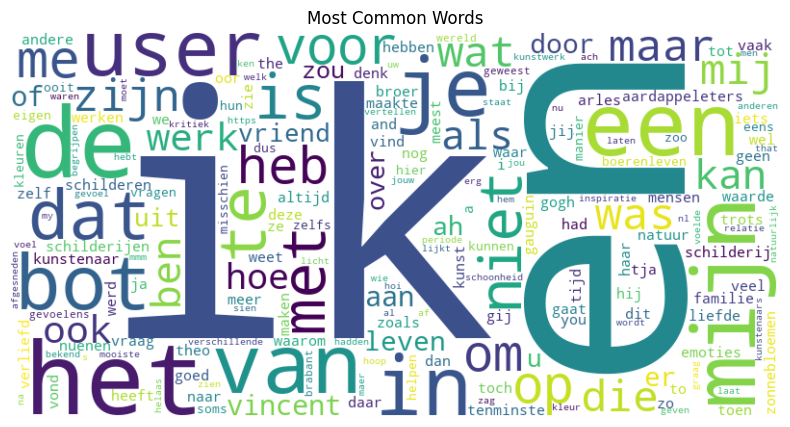

In [13]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()